# Group Project Thicket Python Code

In [73]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [74]:
tk = th.Thicket.from_caliperreader(glob("Bitonic_Input_Size_16384/*.cali"))

In [75]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              67059267      1   
                                                  140404994     1   
                                                  253144097     1   
                                                  766243933     1   
                                                  774874833     1   
                                                  942259915     1   
                                                  1080067789    1   
                                                  1144760187    1   
                                                  1236942026    1   
                                                  1376177391    1   
                                                  1776663666    1   
                                                  2228419935    1   
                                                  2633856902    1   
                                                  2830538036    1   
                                                  3138917054    1   
                                                  3675932821    1   
                                                  3684553068    1   
                                                  3868806445    1   
                                                  3945151647    1   
                                                  4223474884    1   
{'name': 'comm', 'type': 'function'}              67059267      3   
                                                  140404994     3   
                                                  253144097     3   
                                                  766243933     3   
                                                  774874833     3   
                                                  942259915     3   
                                                  1080067789    3   
                                                  1144760187    3   
                                                  1236942026    3   
                                                  1376177391    3   
                                                  1776663666    3   
                                                  2228419935    3   
                                                  2633856902    3   
                                                  2830538036    3   
                                                  3138917054    3   
                                                  3675932821    3   
                                                  3684553068    3   
                                                  3868806445    3   
                                                  3945151647    3   
                                                  4223474884    3   
{'name': 'comm_large', 'type': 'function'}        67059267      4   
                                                  140404994     4   
                                                  253144097     4   
                                                  766243933     4   
                                                  774874833     4   
                                                  942259915     4   
                                                  1080067789    4   
                                                  1144760187    4   
                                                  1236942026    4   
                                                  1376177391    4   
                                                  1776663666    4   
                                                  2228419935    4   
                                                  2633856902    4   
                                                  2830538036    4   
                                                  3138917054    4   
                                                  3675932821    4   
                                                  3684553068

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [76]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,user,launchdate,libraries,cmdline,cluster,Algorithm,Programming_Model,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
67059267,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t1024-v16384.cali,hungry4fun,1700489679,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1024, 16384, 4]",g,Bitonic_Sort,CUDA,int,4,16384,1% perturbation,1024,16,11,"Online, AI"
140404994,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t64-v16384.cali,hungry4fun,1700023634,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 64, 16384, 3]",g,Bitonic_Sort,CUDA,int,4,16384,sorted,64,256,11,"Online, AI"
253144097,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t128-v16384.cali,hungry4fun,1700489477,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 128, 16384, 4]",g,Bitonic_Sort,CUDA,int,4,16384,1% perturbation,128,128,11,"Online, AI"
766243933,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t256-v16384.cali,hungry4fun,1700489537,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 256, 16384, 4]",g,Bitonic_Sort,CUDA,int,4,16384,1% perturbation,256,64,11,"Online, AI"
774874833,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t1024-v16384.cali,hungry4fun,1700023109,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1024, 16384, 2]",g,Bitonic_Sort,CUDA,int,4,16384,reverse,1024,16,11,"Online, AI"
942259915,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t128-v16384.cali,hungry4fun,1700022330,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 128, 16384, 2]",g,Bitonic_Sort,CUDA,int,4,16384,reverse,128,128,11,"Online, AI"
1080067789,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t512-v16384.cali,hungry4fun,1700022921,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 512, 16384, 2]",g,Bitonic_Sort,CUDA,int,4,16384,reverse,512,32,11,"Online, AI"
1144760187,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t128-v16384.cali,hungry4fun,1700023735,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 128, 16384, 3]",g,Bitonic_Sort,CUDA,int,4,16384,sorted,128,128,11,"Online, AI"
1236942026,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t64-v16384.cali,hungry4fun,1700022276,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 64, 16384, 2]",g,Bitonic_Sort,CUDA,int,4,16384,reverse,64,256,11,"Online, AI"


In [77]:
gb = tk.groupby("InputType")

4  thickets created...
{'1% perturbation': <thicket.thicket.Thicket object at 0x2b99cb39a130>, 'random': <thicket.thicket.Thicket object at 0x2b99ca7fdaf0>, 'reverse': <thicket.thicket.Thicket object at 0x2b99ca97ebe0>, 'sorted': <thicket.thicket.Thicket object at 0x2b99c9e6e8b0>}


Compose these 3 groups column-wise to get a holistic view of the data

In [78]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [79]:
ctk.dataframe

1% perturbation  \
                                                                          nid   
node                                              num_threads                   
{'name': 'main', 'type': 'function'}              64                        1   
                                                  128                       1   
                                                  256                       1   
                                                  512                       1   
                                                  1024                      1   
{'name': 'comm', 'type': 'function'}              64                        3   
                                                  128                       3   
                                                  256                       3   
                                                  512                       3   
                                                  1024                      3   
{'name': 'comm_large', 'type': 'function'}        64                        4   
                                                  128                       4   
                                                  256                       4   
                                                  512                       4   
                                                  1024                      4   
{'name': 'cudaMemcpy', 'type': 'function'}        64                        5   
                                                  128                       5   
                                                  256                       5   
                                                  512                       5   
                                                  1024                      5   
{'name': 'comp', 'type': 'function'}              64                        6   
                                                  128                       6   
                                                  256                       6   
                                                  512                       6   
                                                  1024                      6   
{'name': 'comp_large', 'type': 'function'}        64                        7   
                                                  128                       7   
                                                  256                       7   
                                                  512                       7   
                                                  1024                      7   
{'name': 'correctness_check', 'type': 'function'} 64                        8   
                                                  128                       8   
                                                  256                       8   
                                                  512                       8   
                                                  1024                      8   
{'name': 'data_init', 'type': 'function'}         64                        2   
                                                  128                       2   
                                                  256                       2   
                                                  512                       2   
                                                  1024                      2   

                                                                              \
                                                                spot.channel   
node                                              num_threads                  
{'name': 'main', 'type': 'function'}              64           regionprofile   
                                                  128          regionprofile   
                                                  256          regionprofile   
                                                  512          regionprofile   
                  

Perform pandas operations to get the table in a desirable format for plotting

In [80]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node",""),("1% perturbation", "nid"), ("1% perturbation", "spot.channel"), ("1% perturbation", "Min time/rank"),("1% perturbation", "Max time/rank"), ("1% perturbation", "Total time"),("1% perturbation", "Total GPU time"),("1% perturbation", "Min GPU time/rank"),("1% perturbation", "Max GPU time/rank"),
                                                 ("random", "nid"), ("random", "spot.channel"), ("random", "Min time/rank"),("random", "Max time/rank"), ("random", "Total time"),("random", "Total GPU time"),("random", "Min GPU time/rank"),("random", "Max GPU time/rank"),
                                                    ("reverse", "nid"), ("reverse", "spot.channel"), ("reverse", "Min time/rank"),("reverse", "Max time/rank"), ("reverse", "Total time"),("reverse", "Total GPU time"),("reverse", "Min GPU time/rank"),("reverse", "Max GPU time/rank"),
                                                 ('sorted', "nid"), ('sorted', "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([('sorted', "Min time/rank"), ('sorted', "Max time/rank"),('sorted', "Max time/rank"), ('sorted', "Total time"),('sorted', "Total GPU time"),('sorted', "Min GPU time/rank"),('sorted', "Max GPU time/rank")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("index",""),("level_0",""),("sorted","Avg GPU time/rank"),("reverse","Avg GPU time/rank"),("random","Avg GPU time/rank"),("1% perturbation","Avg GPU time/rank")], axis=1)






ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [81]:
ctk.dataframe

1% perturbation        random       reverse  \
                                Avg time/rank Avg time/rank Avg time/rank   
name              num_threads                                               
main              64                 0.340382      0.438727      0.608971   
                  128                0.337619      0.326202      0.331100   
                  256                0.344404      0.338350      0.330291   
                  512                0.343391      0.340769      0.332166   
                  1024               0.339427      0.399293      0.333574   
comm              64                 0.000211      0.000213      0.000221   
                  128                0.000191      0.000196      0.000229   
                  256                0.000194      0.000244      0.000237   
                  512                0.000209      0.000211      0.000210   
                  1024               0.000195      0.000200      0.000189   
comm_large        64                 0.000151      0.000158      0.000159   
                  128                0.000135      0.000138      0.000168   
                  256                0.000136      0.000179      0.000174   
                  512                0.000149      0.000152      0.000148   
                  1024               0.000140      0.000147      0.000135   
cudaMemcpy        64                 0.000119      0.000129      0.000126   
                  128                0.000106      0.000108      0.000135   
                  256                0.000107      0.000143      0.000139   
                  512                0.000116      0.000119      0.000115   
                  1024               0.000110      0.000116      0.000105   
comp              64                 0.001846      0.001797      0.002043   
                  128                0.001728      0.001646      0.001707   
                  256                0.001768      0.001800      0.001784   
                  512                0.001782      0.001676      0.001673   
                  1024               0.001981      0.001858      0.001616   
comp_large        64                 0.001831      0.001782      0.002027   
                  128                0.001715      0.001632      0.001692   
                  256                0.001754      0.001781      0.001766   
                  512                0.001767      0.001661      0.001658   
                  1024               0.001968      0.001843      0.001603   
correctness_check 64                 0.000319      0.000076      0.000367   
                  128                0.000303      0.000081      0.000294   
                  256                0.000333      0.000089      0.000306   
                  512                0.000351      0.000081      0.000285   
                  1024               0.000278      0.000080      0.000273   
data_init         64                 0.000111      0.000373      0.000072   
                  128                0.000100      0.000371      0.000072   
                  256                0.000101      0.000376      0.000072   
                  512                0.000105      0.000372      0.000072   
                  1024               0.000100      0.000377      0.000071   

                                     sorted  
                              Avg time/rank  
name              num_threads                
main              64               0.337880  
                  128              0.337893  
                  256              0.327791  
                  512              0.612060  
                  1024             0.343368  
comm              64               0.000205  
                  128              0.000207  
                  256              0.000204  
                  512              0.000222  
                  1024             0.000278  
comm_large        64               0.000147  
                  128              0.000150  
                  256       

In [82]:
# var = ctk.dataframe.loc["comp_large", 1024]
# ctk.dataframe.loc["comp_large", 1024]

In [83]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = ctk.dataframe.columns.tolist()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [84]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [85]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [86]:
ctk.dataframe.loc["main"]

,1% perturbation,random,reverse,sorted
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_threads,,,,
64,0.340382,0.438727,0.608971,0.337880
128,0.337619,0.326202,0.331100,0.337893
256,0.344404,0.338350,0.330291,0.327791
512,0.343391,0.340769,0.332166,0.612060
1024,0.339427,0.399293,0.333574,0.343368


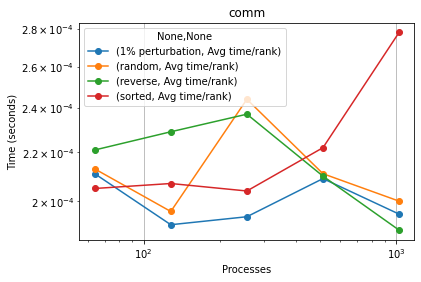

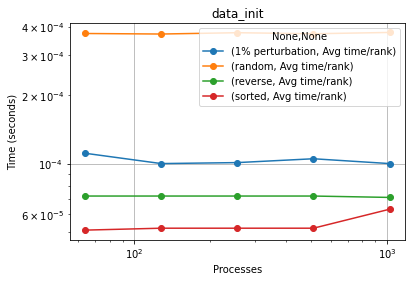

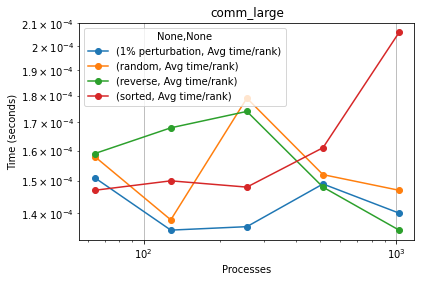

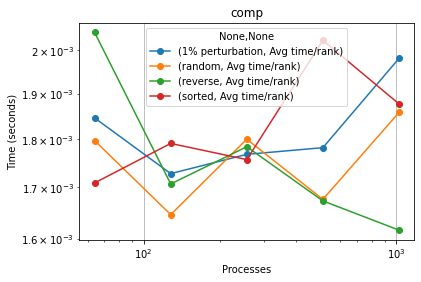

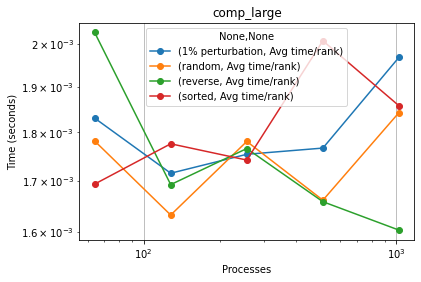

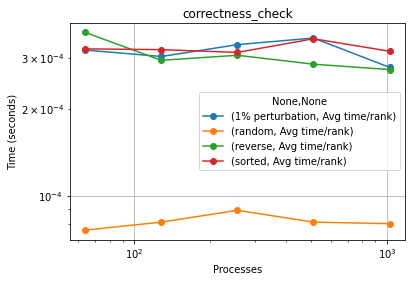

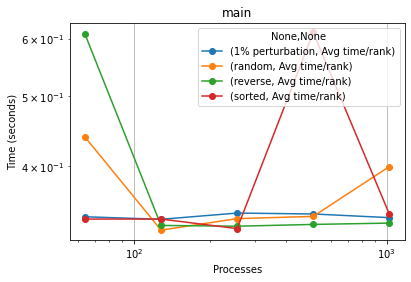

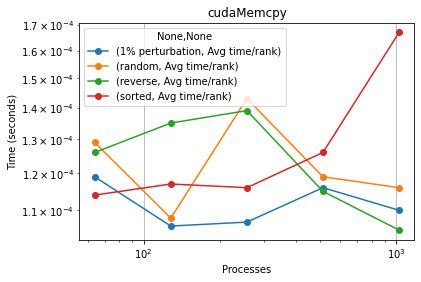

In [87]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

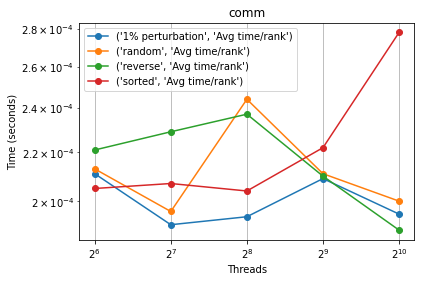

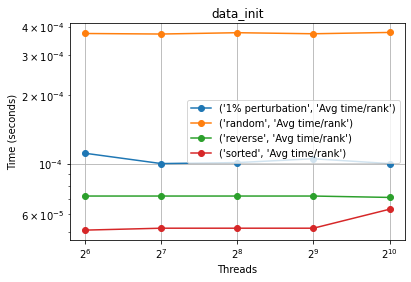

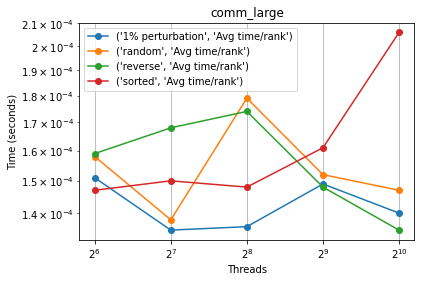

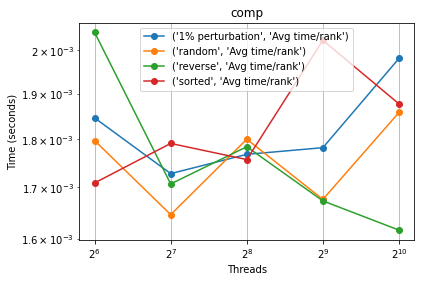

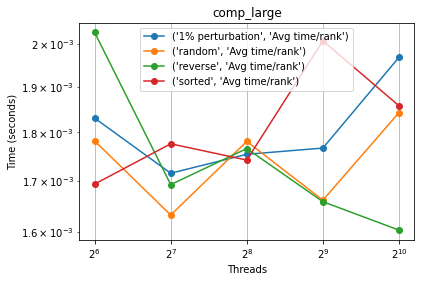

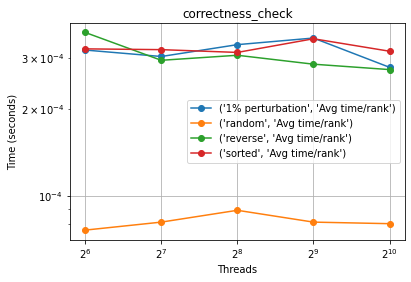

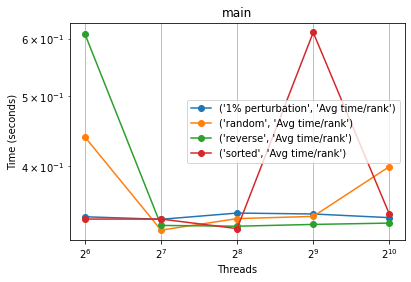

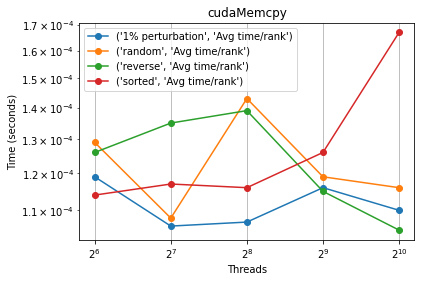

In [88]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

## Speedup

<ipython-input-89-4e94acc1117b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe


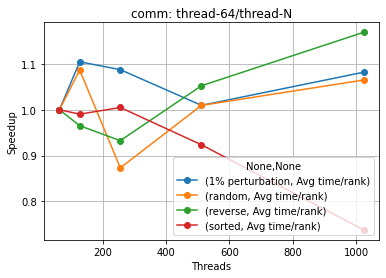

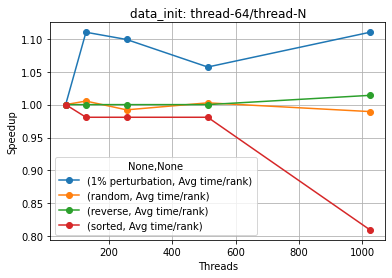

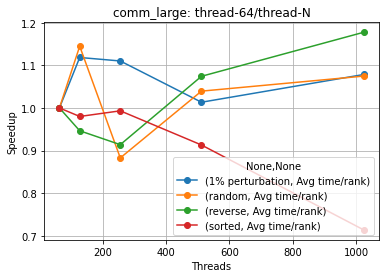

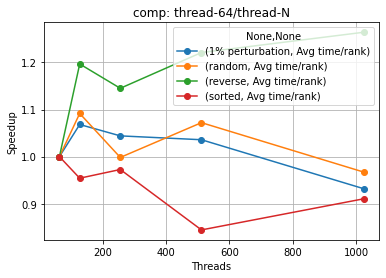

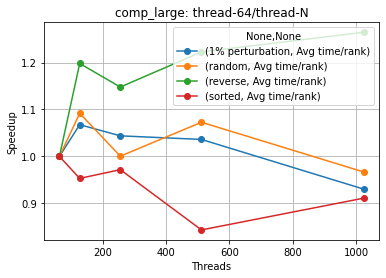

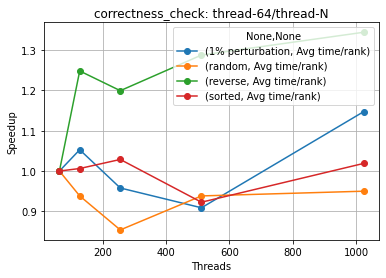

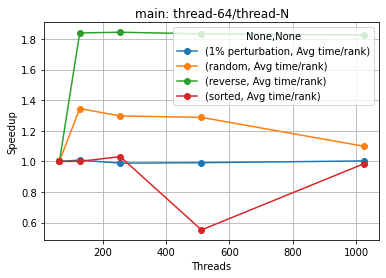

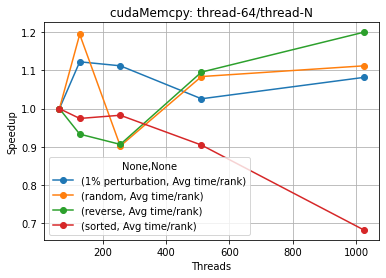

In [89]:
# print(ctk.dataframe.index.levels)

speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-64/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

In [90]:
 print(ctk.dataframe.index.levels)

[['comm', 'comm_large', 'comp', 'comp_large', 'correctness_check', 'cudaMemcpy', 'data_init', 'main'], [64, 128, 256, 512, 1024]]
